In [ ]:
pip install scikit-learn-extra

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import cluster
import seaborn as sns
from sklearn import metrics

In [161]:
# функции для вычисления метрик качества кластерищации
#Calinski-Harabasz index 
def Cal_Har_index(data,labels):
    res = metrics.calinski_harabasz_score(data, labels)
    print("Calinski-Harabasz index:\t{0:.5f}".format(res))

#Davies–Bouldin index 
def Dav_Boul_index(data,labels):
    res = metrics.davies_bouldin_score(data, labels)
    print("Davies–Bouldin index:\t\t{0:.5f}".format(res))    

#Silhouette Coefficient 
def Silhouette_coeff(data,labels,is_manhattan):
    res = 0
    if is_manhattan:
      res = metrics.silhouette_score(data, labels, metric='manhattan')
    else:
      res = metrics.silhouette_score(data, labels, metric='euclidean')
    print("Silhouette Coefficient:\t\t{0:.5f}".format(res))   

def mean_of_subset(data):
    length, parameters = data.shape
    centroid = []
    for i in range(parameters):
        centroid.append(np.sum(data[:, i])/length)
    return np.array(centroid)
#Cluster_cohesion
def Cluster_cohesion(data,labels):
    #этой метрики нет в арсенале sklearn, поэтому реализуем её вручную
    num_clusters = np.unique(labels)
    
    wss = 0
    for k in range(data.shape[0]):
        cluster_subset = []
        for i in range(data.shape[0]):
            if labels[i] == k:
                cluster_subset.append(data[i])
                
        cluster = np.array(cluster_subset)
        if cluster.shape[0] != 0:
            mean_elem = mean_of_subset(cluster)  
        else:
            mean_elem = np.zeros(shape=(data.shape[1]))
        
        for i in range(cluster.shape[0]):
            temp = 0
            for j in range(cluster.shape[1]):
                temp += (cluster[i][j]-mean_elem[j])**2
            wss += temp
    #return wss
    print("Cluster_cohesion:\t\t{0:.5f}".format(wss)) 


def print_metrics(data,labels, true_labels = None, is_manhattan = False):
  Cal_Har_index(data,labels)
  Dav_Boul_index(data,labels)
  Silhouette_coeff(data,labels, is_manhattan)
  Cluster_cohesion(data,labels)
  if true_labels is not None:
    # Adjasted Rand Index
    res = metrics.adjusted_rand_score(true_labels, labels)
    print("Adjasted Rand Index:\t\t{0}\n  ".format(res), end='')


In [ ]:
df1 = pd.read_table('/content/moons.txt',header=None, names=['X','Y','Class'],delimiter=' ')
df1.head()

,X,Y,Class
0,-0.886909,-0.460419,0
1,0.060729,-0.288140,1
2,0.273133,0.199329,1
3,1.553436,-0.413631,1
4,-0.129158,0.426655,0


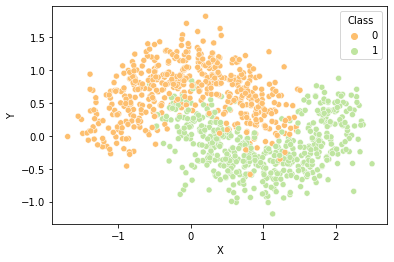

In [ ]:
sns.scatterplot(x="X", y="Y", hue='Class', data=df1, palette=sns.color_palette("Spectral", n_colors=2))

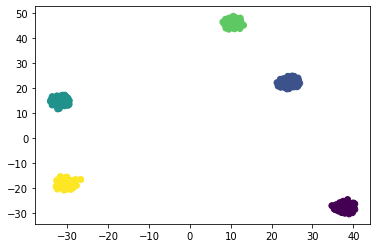

In [6]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples = 1000,n_features=2, centers=5,cluster_std = 1,center_box=(-58.0,58.0),shuffle=False)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)

plt.show()

In [20]:
df = pd.DataFrame(data=np.c_[X,y],columns=['X','Y','Class'])
df.to_csv('data_1.csv')

In [38]:
df1 = pd.read_csv('data_1.csv')
df1.drop(columns='Unnamed: 0', inplace=True)
df1.head()

,X,Y,Class
0,37.705379,-27.489613,0.0
1,39.985478,-28.768783,0.0
2,37.153046,-29.906811,0.0
3,36.324096,-28.425437,0.0
4,38.068208,-26.800032,0.0


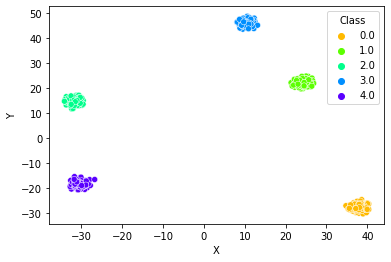

In [67]:
sns.scatterplot(x="X", y="Y", hue='Class', data=df1, palette=sns.color_palette("gist_rainbow", n_colors=5))

In [68]:
from sklearn.preprocessing import StandardScaler
X = df1[['X','Y']]
y = df1['Class']
sc = StandardScaler()
sc.fit(X)
# Apply the scaler to the X training data
X = sc.transform(X)


In [75]:
clustered_X = cluster.KMeans(n_clusters=5, random_state=0).fit(X)

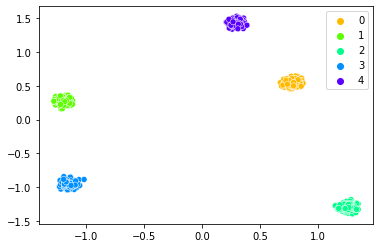

In [99]:
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustered_X.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=5))


In [162]:
print_metrics(X,clustered_X.labels_,y)

Calinski-Harabasz index:	193636.11747
Davies–Bouldin index:		0.07375
Silhouette Coefficient:		0.94747
Cluster_cohesion:		2.56596
Adjasted Rand Index:		1.0
  

In [156]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=5, metric='manhattan',init='k-medoids++', random_state=0).fit(X)

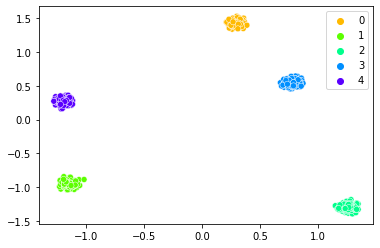

In [157]:
sns.scatterplot(x=X[:,0], y = X[:,1], hue=kmedoids.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=5))
#sns.scatterplot(x=kmedoids.cluster_centers_[:,0], y = kmedoids.cluster_centers_[:,1], hue=[0,0,0,0,0],  palette=sns.color_palette("binary", n_colors=1))


In [163]:
print_metrics(X,kmedoids.labels_,y, True)

Calinski-Harabasz index:	193636.11747
Davies–Bouldin index:		0.07375
Silhouette Coefficient:		0.94413
Cluster_cohesion:		2.56596
Adjasted Rand Index:		1.0
  